In [295]:
import pandas as pd     
import numpy as np    
import sqlite3 as sql
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

---
#### CS 260 Final Project - SP23
---

# Fuel Consumption 2000-2022

### By: Ben Phillippy, Shane Artis, Matt Marriott


---

## 1. Introduction

For this project, our group explored fuel consumption data. Our group had a intrest in vechicles and wanted to learn more about the efficency, practicality, and sustainability of everday cars we see and drive. Our objective is do research to determine the characteriscs of vehicles that impact the emissions and the enviroment the most. To do this we obatined reliable second hand data from Kaggle called fuel consumption which gave us different varaibles to do further analysis. 

We focused on asking these questions.
  1. What type of vehicle class gets the best emissions?
  2. What are the average emissions for each fuel source across each year?
  3. What type of engines produce the most emissions?
  4. What's the average liters per 100 kilometers burnt driving for vehicles? 
     How do compact cars comapre?
  5. How does curb weight compare to the emissions released from a vehicle?

---

## 2. Data

A direct link to the data can be found at the following website. 
 * https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption?resource=download
 
Data was collected by Ahmet Yılmaz the owner of this database file. This dataset was collected
from the Canadian.gov website and updated annually to the owner's file. The last data collection
update was done on 1/27/23.


In [296]:

try:
    
    csv_data_fuel = pd.read_csv("https://raw.githubusercontent.com/sartis14/FUEL_DATA_UPDATED/main/Emmissions%20Car%20Data%20Updated%20Main.csv")
    csv_data_sales = pd.read_csv("https://raw.githubusercontent.com/sartis14/CAR_SALES_UPDATED/main/Car%20Weight%20Updated.csv") 

     
    conn = sql.connect('fuel_consumptionss.db')

   
    csv_data_fuel.to_sql('fuel_consumption', conn, index = False)
    csv_data_sales.to_sql('car_sales', conn, index = False)
    
except ValueError: 
    print("""A ValueError occurred. If you've run this cell twice, 
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.""")

A ValueError occurred. If you've run this cell twice, 
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.


In [297]:

sql_statement = """SELECT * 
                   FROM fuel_consumption"""

results = pd.read_sql_query(sql_statement, conn)
results

,year,make,model,veh_class,eng_size,cly,trans,fuel,fuel_cons,hwy_lkm,comb_lkm,comb_mpg,emissions
0,2000,acura,1.6el,compact,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,acura,1.6el,compact,1.6,4,M5,None,8.5,6.5,7.6,37,175
2,2000,acura,3.2tl,mid-size,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,acura,3.5rl,mid-size,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,acura,integra,subcompact,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,volvo,xc40 t5 awd,suv: small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,volvo,xc60 b5 awd,suv: small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,volvo,xc60 b6 awd,suv: small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,volvo,xc90 t5 awd,suv: standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


### 2.1 Summary of Variables within the Fuel_Consumption Table

In [298]:
'''
CREATE TABLE "fuel_consumption" (
	"id"	INTEGER,
	"year"	TEXT,
	"make"	TEXT,
	"model"	TEXT,
	"veh_class"	TEXT,
	"eng_size"	REAL,
	"cly"	INTEGER,
	"trans"	TEXT,
	"fuel"	TEXT,
	"fuel_cons"	REAL,
	"hwy_lkm"	REAL,
	"comb_lkm"	REAL,
	"comb_mpg"	INTEGER,
	"emissions"	INTEGER,
	PRIMARY KEY("id")
);
''';

This dataset contains 22,556 rows and 13 distinct columns.  All variables are explained in this section. 

Here are the variables, their descriptions, their units, their types, and some descriptive statistics.

* **year** – This column lists the different years from 2000 to 2022 
    * Number of missing values: 0
    * Contains 23 distinct values:
        * 2000, 2001, 2002, 2003, ……… 2022


* **make** – This column describes the name brand of the company that produces the car
    * Number of missing values: 0
    * Contains 87 distinct values:
        * Acura, Volvo, BMW, Audi, Buick




* **model** – This column is a subcategory of the make column that
describes the specific type of car it is 
    * Number of missing values: 0
    * Contains 4242 distinct values:
        * 1.6EL, 3.2TL, INTEGRA, NSX, A4 




* **veh_class** – This column describes the size of the different car Models 
    * Number of missing values: 0
    * Contains 32 distinct values:
        * compact, mid-size, suv, full-size, pickup truck-small




* **trans** – This column describes what type of transmission is
used by each vehicle 
    * Number of missing values: 0
    * Contains 30 distinct values:
        * A4, A5, A6, A7, M5, AS5, M6 


* **fuel** – This column describes the type of fuel like regular, premium,
diesel, or other fuel that a vehicle may use 
    * Number of missing values: 0
    * Contains 5 distinct values:
        * X, Z, E, N, D


* **cly** – The column describes the number of cylinders in each
vehicle where fuel is combusted into power 
	* Units: cubic centimeters
    * Number of missing values: 0
    * Contains 9 distinct values:
        * 2, 3, 4, 5, 6, 8, 10, 12, 16  



CONTINUOUS VARIABLES
* **eng_size** – This column describes the size of the column with the larger numbers being a bigger and more powerful engine 
    * Units: litre per cubic centimeters
    * Number of missing values: 0
    * max value: 8.4
    * min value: 0.8
    * average value: 3.356

* **fuel_cons** –  This column describes the rate at which fuel is
consumed by a vehicle
    * Number of missing values:0
    * Units: liters per 100 kilometers.
    * max value: 30.6
    * min value: 3.5
    * average value: 12.763513
   

* **hwy_lkm** – This column describes the number of liters of
fuel that is used on average while driving on the highway
    * Number of missing values:0
    * Units: liters/100km
    * max value: 20.9
    * min value: 3.2
    * average value: 8.919126
    




* **comb_lkm** –  This column calculates the average amount of
liters per 100km for city and highway driving
    * Number of missing values:0
    * Units: liters/100km 
    * max value: 26.1
    * min value:3.6 
    * average value: 11.034341
   




* **comb_mpg** – The column calculates the average amount
of miles per gallon used by a vehicle while driving in the city or on highway
    * Number of missing values:0
    * Units: miles / per gallon 
    * max value: 78
    * min value: 11
    * average value: 27.374534
  




* **emissions** – This column describes the number of gasses and
pollutants released by a vehicle while in use, measured in g/km (grams of carbon dioxide generated by car/ km driven)
    * Number of missing values:0
    * Units:gram/per km 
    * max value: 608
    * min value: 83
    * average value: 250.068452 



### 2.2 Code used to Summarize Variables

In [299]:
sql_statement = """
                    SELECT COUNT(year)
                    FROM fuel_consumption
                    WHERE year IS NULL;
                """
#A count of the number of nulls within the year column
results1 = pd.read_sql_query(sql_statement, conn)
results1

,COUNT(year)
0,0


In [300]:
sql_statement = """
                    SELECT COUNT(make)
                    FROM fuel_consumption
                    WHERE make IS NULL;
                """
#A count of the number of nulls within the make column
results2 = pd.read_sql_query(sql_statement, conn)
results2

,COUNT(make)
0,0


In [301]:
sql_statement = """
                    SELECT COUNT(model)
                    FROM fuel_consumption
                    WHERE model IS NULL;
                """
#A count of the number of nulls within the model column
results3 = pd.read_sql_query(sql_statement, conn)
results3

,COUNT(model)
0,0


In [302]:
sql_statement = """
                    SELECT COUNT(veh_class)
                    FROM fuel_consumption
                    WHERE veh_class IS NULL;
                """
#A count of the number of nulls within the veh_class column
results4 = pd.read_sql_query(sql_statement, conn)
results4

,COUNT(veh_class)
0,0


In [303]:
sql_statement = """
                    SELECT COUNT(trans)
                    FROM fuel_consumption
                    WHERE trans IS NULL;
                """
#A count of the number of nulls within the trans column
results5 = pd.read_sql_query(sql_statement, conn)
results5

,COUNT(trans)
0,0


In [304]:
sql_statement = """
                    SELECT COUNT(fuel)
                    FROM fuel_consumption
                    WHERE year IS NULL;
                """
#A count of the number of nulls within the fuel column
results6 = pd.read_sql_query(sql_statement, conn)
results6

,COUNT(fuel)
0,0


In [305]:
sql_statement = """
                    SELECT COUNT(eng_size)
                    FROM fuel_consumption
                    WHERE eng_size IS NULL;
                """
#A count of the number of nulls within the eng_size column
results7 = pd.read_sql_query(sql_statement, conn)
results7

,COUNT(eng_size)
0,0


In [306]:
#A count of the number of nulls within the cly column
sql_statement = """
                    SELECT COUNT(cly)
                    FROM fuel_consumption
                    WHERE cly IS NULL;
                """

results8 = pd.read_sql_query(sql_statement, conn)
results8

,COUNT(cly)
0,0


In [307]:
#Get the distinct values in the year column
sql_statement = """
                    SELECT COUNT(DISTINCT(year))
                    FROM fuel_consumption;
                """

results9 = pd.read_sql_query(sql_statement, conn)
results9

,COUNT(DISTINCT(year))
0,23


In [308]:
#Get the distinct values in the make column
sql_statement = """
                    SELECT COUNT(DISTINCT(make))
                    FROM fuel_consumption;
                """

results0 = pd.read_sql_query(sql_statement, conn)
results0

,COUNT(DISTINCT(make))
0,52


In [309]:
#Get the distinct values in the model column
sql_statement = """
                    SELECT COUNT(DISTINCT(model))
                    FROM fuel_consumption;
                """

results10 = pd.read_sql_query(sql_statement, conn)
results10

,COUNT(DISTINCT(model))
0,3730


In [310]:
#Get the distinct values in the veh_class column
sql_statement = """
                    SELECT COUNT(DISTINCT(veh_class))
                    FROM fuel_consumption;
                """

results11 = pd.read_sql_query(sql_statement, conn)
results11

,COUNT(DISTINCT(veh_class))
0,17


In [311]:
#Get the distinct values in the trans column
sql_statement = """
                    SELECT COUNT(DISTINCT(trans))
                    FROM fuel_consumption;
                """

results12 = pd.read_sql_query(sql_statement, conn)
results12

,COUNT(DISTINCT(trans))
0,30


In [312]:
#Get the distinct values in the fuel column
sql_statement = """
                    SELECT COUNT(DISTINCT(fuel))
                    FROM fuel_consumption;
                """

results13 = pd.read_sql_query(sql_statement, conn)
results13

,COUNT(DISTINCT(fuel))
0,5


In [313]:
#Get the distinct values in the cly column
sql_statement = """
                    SELECT COUNT(DISTINCT(cly))
                    FROM fuel_consumption;
                """

results14 = pd.read_sql_query(sql_statement, conn)
results14

,COUNT(DISTINCT(cly))
0,9


In [314]:
#Get the distinct values in the year column
sql_statement = """
                    SELECT DISTINCT(year)
                    FROM fuel_consumption;
                """

results15 = pd.read_sql_query(sql_statement, conn)
results15

,year
0,2000
1,2001
2,2002
3,2003
4,2004
5,2005
6,2006
7,2007
8,2008
9,2009


In [315]:
#Get the distinct values in the make column
sql_statement = """
                    SELECT DISTINCT(make)
                    FROM fuel_consumption;
                """

results16 = pd.read_sql_query(sql_statement, conn)
results16

,make
0,acura
1,audi
2,bmw
3,buick
4,cadillac
5,chevrolet
6,chrysler
7,daewoo
8,dodge
9,ferrari


In [316]:
#Get the distinct values in the model column
sql_statement = """
                    SELECT DISTINCT(model)
                    FROM fuel_consumption;
                """

results17 = pd.read_sql_query(sql_statement, conn)
results17

,model
0,1.6el
1,3.2tl
2,3.5rl
3,integra
4,integra gsr/type r
...,...
3725,s60 b5 awd
3726,s90 b6 awd
3727,v90 cc b6 awd
3728,xc60 b5 awd


In [317]:
#Get the distinct values in the veh_class column
sql_statement = """
                    SELECT UPPER(DISTINCT(veh_class))
                    FROM fuel_consumption;
                """

results18 = pd.read_sql_query(sql_statement, conn)
results18

,UPPER(DISTINCT(veh_class))
0,COMPACT
1,COMPACT
2,MID-SIZE
3,MID-SIZE
4,SUBCOMPACT
...,...
22551,SUV: SMALL
22552,SUV: SMALL
22553,SUV: SMALL
22554,SUV: STANDARD


In [318]:
#Get the distinct values in the trans column
sql_statement = """
                    SELECT DISTINCT(trans)
                    FROM fuel_consumption;
                """

results19 = pd.read_sql_query(sql_statement, conn)
results19

,trans
0,A4
1,M5
2,AS5
3,AS4
4,M6
5,A5
6,A3
7,AS6
8,AV
9,A6


In [319]:
#Get the distinct values in the fuel column
sql_statement = """
                    SELECT DISTINCT(fuel)
                    FROM fuel_consumption;
                """

results20 = pd.read_sql_query(sql_statement, conn)
results20

,fuel
0,X
1,None
2,Z
3,E
4,N
5,D


In [320]:
#Get the distinct values in the cly column
sql_statement = """
                    SELECT DISTINCT(cly)
                    FROM fuel_consumption;
                """

results00 = pd.read_sql_query(sql_statement, conn)
results00

,cly
0,4
1,6
2,8
3,12
4,3
5,10
6,5
7,2
8,16


In [321]:
#Get the min, max, avergae, and number of missing values in the eng_size column
sql_statement = """
                    SELECT MIN(eng_size), MAX(eng_size), AVG(eng_size), count(eng_size)-22556 AS missing_values
                    FROM fuel_consumption;
                """

results21 = pd.read_sql_query(sql_statement, conn)
results21

,MIN(eng_size),MAX(eng_size),AVG(eng_size),missing_values
0,0.8,8.4,3.356646,0


In [322]:
#Get the min, max, avergae, and number of missing values in the cly column
sql_statement = """
                    SELECT MIN(cly), MAX(cly), AVG(cly), count(cly)-22556 AS missing_values
                    FROM fuel_consumption;
                """

results22 = pd.read_sql_query(sql_statement, conn)
results22

,MIN(cly),MAX(cly),AVG(cly),missing_values
0,2,16,5.854141,0


In [323]:
#Get the min, max, avergae, and number of missing values in the fuel_cons column
sql_statement = """
                    SELECT MIN(fuel_cons), MAX(fuel_cons), AVG(fuel_cons), count(fuel_cons)-22556 AS missing_values
                    FROM fuel_consumption;
                """

results23 = pd.read_sql_query(sql_statement, conn)
results23

,MIN(fuel_cons),MAX(fuel_cons),AVG(fuel_cons),missing_values
0,3.5,30.6,12.763513,0


In [324]:
#Get the min, max, avergae, and number of missing values in the hwy_lkm column
sql_statement = """
                    SELECT MIN(hwy_lkm), MAX(hwy_lkm), AVG(hwy_lkm), count(hwy_lkm)-22556 AS missing_values
                    FROM fuel_consumption;
                """

results24 = pd.read_sql_query(sql_statement, conn)
results24

,MIN(hwy_lkm),MAX(hwy_lkm),AVG(hwy_lkm),missing_values
0,3.2,20.9,8.919126,0


In [325]:
#Get the min, max, avergae, and number of missing values in the comb_lkm column
sql_statement = """
                    SELECT MIN(comb_lkm), MAX(comb_lkm), AVG(comb_lkm), count(comb_lkm)-22556 AS missing_values
                    FROM fuel_consumption;
                """

results25 = pd.read_sql_query(sql_statement, conn)
results25

,MIN(comb_lkm),MAX(comb_lkm),AVG(comb_lkm),missing_values
0,3.6,26.1,11.034341,0


In [326]:
#Get the min, max, avergae, and number of missing values in the comb_mpg column
sql_statement = """
                    SELECT MIN(comb_mpg), MAX(comb_mpg), AVG(comb_mpg), count(comb_mpg)-22556 AS missing_values
                    FROM fuel_consumption;
                """

results26 = pd.read_sql_query(sql_statement, conn)
results26

,MIN(comb_mpg),MAX(comb_mpg),AVG(comb_mpg),missing_values
0,11,78,27.374534,0


In [327]:
#Get the min, max, avergae, and number of missing values in the emmissions column
sql_statement = """
                    SELECT MIN(emissions), MAX(emissions), AVG(emissions), count(emissions)-22556 AS missing_values
                    FROM fuel_consumption;
                """

results27 = pd.read_sql_query(sql_statement, conn)
results27

,MIN(emissions),MAX(emissions),AVG(emissions),missing_values
0,83,608,250.068452,0


---

---

## 3. Analysis


It is our overall goal within this project to determine what are the main characteristics of vehicles that contribute towards overall emissions into the environment. This way we can help aid policy makers and the general public into being more informed when it comes to reducing the overall amount of greenhouse gases released from vehicles. To begin our analysis, we chose to look at the different types of vehicle classes and which ones get the best fuel consumption. We wished to discover which vehicle classes are better/more efficient in terms of fuel consumption and lead to less of an impact on the environment. This we felt was an important beginning step within the discovery of determining which vehicles contribute the most to the releasing of high amounts of greenhouse gases.

### Q1:  What type of vehicle class gets the best emissions?

In [328]:
#Here we select the vehicle class and average fuel consumption per vehicle class 
#in order to better understand what vehicles are better to use for the environment.

sql_statement = """ SELECT veh_class AS veh_class, AVG(fuel_cons) AS average_fuel_consumption
                    FROM fuel_consumption
                    GROUP BY veh_class 
                    ORDER BY Average_Fuel_Consumption ASC; """

veh = pd.read_sql_query(sql_statement, conn)
veh

,veh_class,average_fuel_consumption
0,station wagon: small,9.985155
1,compact,10.656809
2,suv: small,11.151651
3,mid-size,11.402091
4,special purpose vehicle,11.644737
5,station wagon: mid-size,11.779200
6,subcompact,11.781939
7,minicompact,11.888438
8,pickup truck: small,13.281063
9,minivan,13.349091


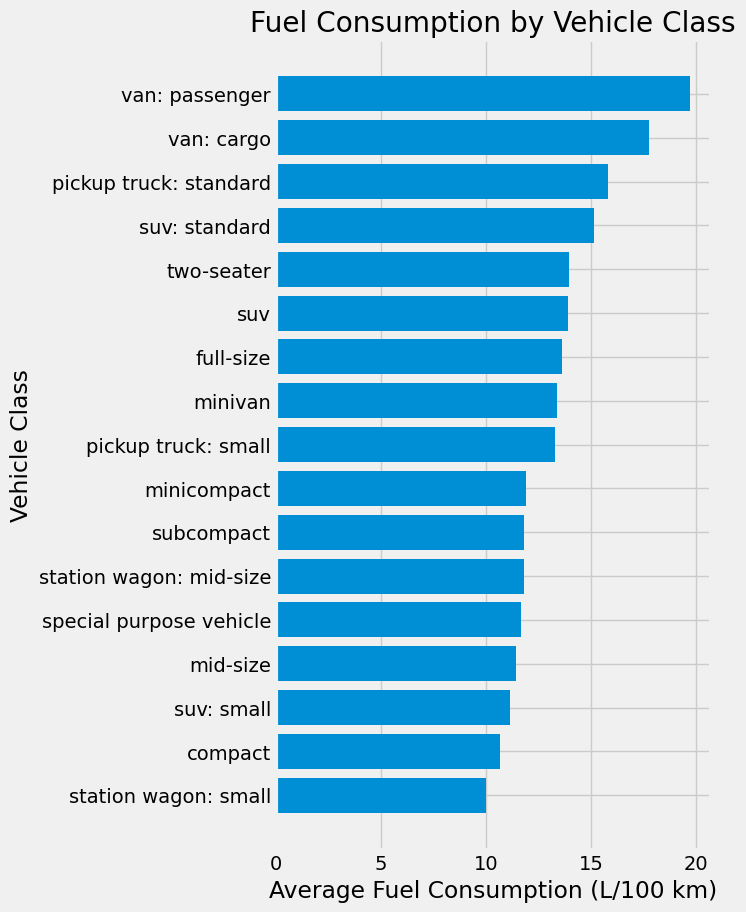

In [329]:
#Here we are creating a bar graph to show the fuel consumption by vehicles depending on what vehicle class they fall under

plt.figure(figsize = (5,10))
plt.barh(veh['veh_class'], veh['average_fuel_consumption'])
plt.ylabel('Vehicle Class')
plt.xlabel('Average Fuel Consumption (L/100 km)')
plt.title('Fuel Consumption by Vehicle Class');

From the visualization above, we learned the average fuel consumption by vehicle class. This was messuraed in (L/100 km), or in other words how many Litters of gas would have to be burned inorder to travel 100km. The smaller the number, the more efficient the vehicle class. We can see from the chart, that vehicles such as Small Station Wagons, Compact Cars, and Mid-Sized have the lowest levels of fuel consumption. Vehicles such as Vans, Pick-Up Trucks, and SUVs returned the highest levels of fuel consumption seen. There was a clear trend and grouping seen within this chart, which really displayed that larger vehicles have higher average fuel consumption rates on average.  

Understanding that distinct vehicle types have clearly different levels of fuel consumption was a key first discovery. We now wanted to discover if there were other groupings that would also influence the overall emissions from a vehicle. Were these vehicles types also grouped by some other factor?

### Q2:  What are the average emissions for each fuel source across each year?

In question two, we will look more at the average emissions, rather than looking at the consumption of fuel per vehicle class. We will break down each fuel source to get the average emission levels from all corresponding vehicles that used that fuel source. This will also be charted across time so that we can get a look at whether emissions from vehicles have been approving over time or not. 

In [330]:
#This code shows us the average emissions by year for the fuel type "Diesel"

sql_statement = """ SELECT year,fuel, AVG(emissions) AS average_emissions
                    FROM fuel_consumption
                    WHERE fuel = 'X'
                    GROUP BY year
                   
                    ; """

linex = pd.read_sql_query(sql_statement, conn)
linex

,year,fuel,average_emissions
0,2000,X,260.781457
1,2001,X,260.748869
2,2002,X,263.158242
3,2003,X,262.806773
4,2004,X,262.976789
5,2005,X,255.648250
6,2006,X,254.488971
7,2007,X,251.125899
8,2008,X,245.804029
9,2009,X,239.560764


In [331]:
#This code shows us the average emissions by year for the fuel type "Regular Gas"

sql_statement = """ SELECT year,fuel, AVG(emissions) AS average_emissions
                    FROM fuel_consumption
                    WHERE fuel = 'D'
                    GROUP BY year
                   
                    ; """

lined = pd.read_sql_query(sql_statement, conn)
lined

,year,fuel,average_emissions
0,2000,D,150.000000
1,2001,D,150.000000
2,2002,D,150.000000
3,2003,D,150.000000
4,2004,D,156.125000
5,2005,D,182.857143
6,2006,D,164.750000
7,2007,D,258.000000
8,2008,D,261.400000
9,2009,D,249.833333


In [332]:
#This code shows us the average emissions by year for the fuel type "Premium Gas"

sql_statement = """ SELECT year, fuel, AVG(emissions) AS average_emissions
                    FROM fuel_consumption
                    WHERE fuel = 'Z'
                    GROUP BY year
                   
                    ; """

linez = pd.read_sql_query(sql_statement, conn)
linez

,year,fuel,average_emissions
0,2000,Z,260.914773
1,2001,Z,251.811659
2,2002,Z,262.075099
3,2003,Z,258.965157
4,2004,Z,258.903509
5,2005,Z,262.539352
6,2006,Z,260.398458
7,2007,Z,260.090909
8,2008,Z,260.575000
9,2009,Z,264.808656


In [333]:
#This code shows us the average emissions by year for the fuel type "Ethanol"

sql_statement = """ SELECT year,fuel, AVG(emissions) AS average_emissions
                    FROM fuel_consumption
                    WHERE fuel = 'E'
                    GROUP BY year
                   
                    ; """

linee = pd.read_sql_query(sql_statement, conn)
linee

,year,fuel,average_emissions
0,2000,E,251.000000
1,2001,E,229.500000
2,2002,E,290.692308
3,2003,E,276.058824
4,2004,E,301.869565
5,2005,E,301.900000
6,2006,E,294.695652
7,2007,E,282.754717
8,2008,E,275.666667
9,2009,E,263.802817


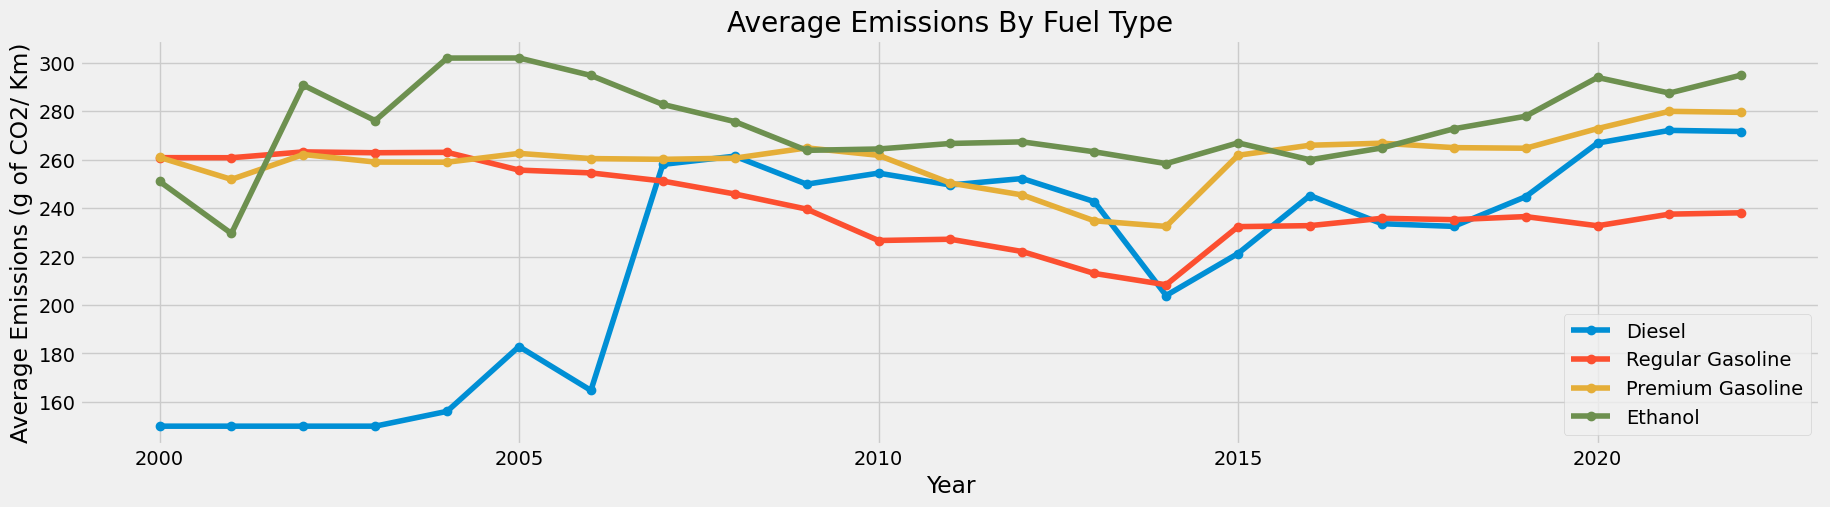

In [334]:
plt.figure(figsize =(20,5))
plt.plot(lined['year'], lined['average_emissions'], marker ="o" )  
plt.plot(linex['year'], linex['average_emissions'], marker ="o" )
plt.plot(linez['year'], linez['average_emissions'], marker ="o" )
plt.plot(linee['year'], linee['average_emissions'], marker ="o" )
plt.title('Average Emissions By Fuel Type')
plt.xlabel('Year')
plt.ylabel('Average Emissions (g of CO2/ Km)')
plt.legend(['Diesel', 'Regular Gasoline', 'Premium Gasoline', 'Ethanol', 'Natural Gas']);

From the visualization above, we clearly see the difference and change year over year of the emissions by fuel type. We can see that there really is not a downward trend overall in any regard. The only fuel source to decrease over the 20-year span was regular gasoline, and only by a slight amount. There also does not appear to be a fuel source that stands out as having higher average emissions. Ethanol did appear to remain at the top of this list, but did not convey a resounding difference from the other fuel sources. 

From our first two visualizations it became clearer that the vehicle make was more of a determining factor in the emissions released from a vehicle than the fuel type that it used. For this reason, we wanted to see if that trend would continue if we looked into engine sizes of these vehicles.

### Q3:  What types of engines produce the most emissions?

In Question 3, we will be looking at the amount of emissions an engine produces based off of engine size.

In [335]:
#This code shows us the make, engine size, and emissions for the vehicle class 'SUV'

sql_statement = """ SELECT make, eng_size, emissions 
                    FROM fuel_consumption
                    WHERE veh_class = 'suv'
                    
                    ; """

scattersuv = pd.read_sql_query(sql_statement, conn)
scattersuv

,make,eng_size,emissions
0,bmw,4.4,258
1,cadillac,5.7,382
2,chevrolet,4.3,294
3,chevrolet,4.3,288
4,chevrolet,4.3,308
...,...,...,...
2569,volvo,3.2,223
2570,volvo,3.2,230
2571,volvo,3.0,242
2572,volvo,3.2,253


In [336]:
#This code shows us the make, engine size, and emissions for the vehicle class 'Compact'

sql_statement = """ SELECT make, eng_size, emissions 
                    FROM fuel_consumption
                    WHERE veh_class = 'compact'
                    
                    ; """

scatter = pd.read_sql_query(sql_statement, conn)
scatter

,make,eng_size,emissions
0,acura,1.6,186
1,acura,1.6,175
2,audi,1.8,218
3,audi,1.8,193
4,audi,2.8,248
...,...,...,...
3072,volkswagen,1.5,161
3073,volkswagen,2.0,185
3074,volkswagen,2.0,186
3075,volvo,2.0,186


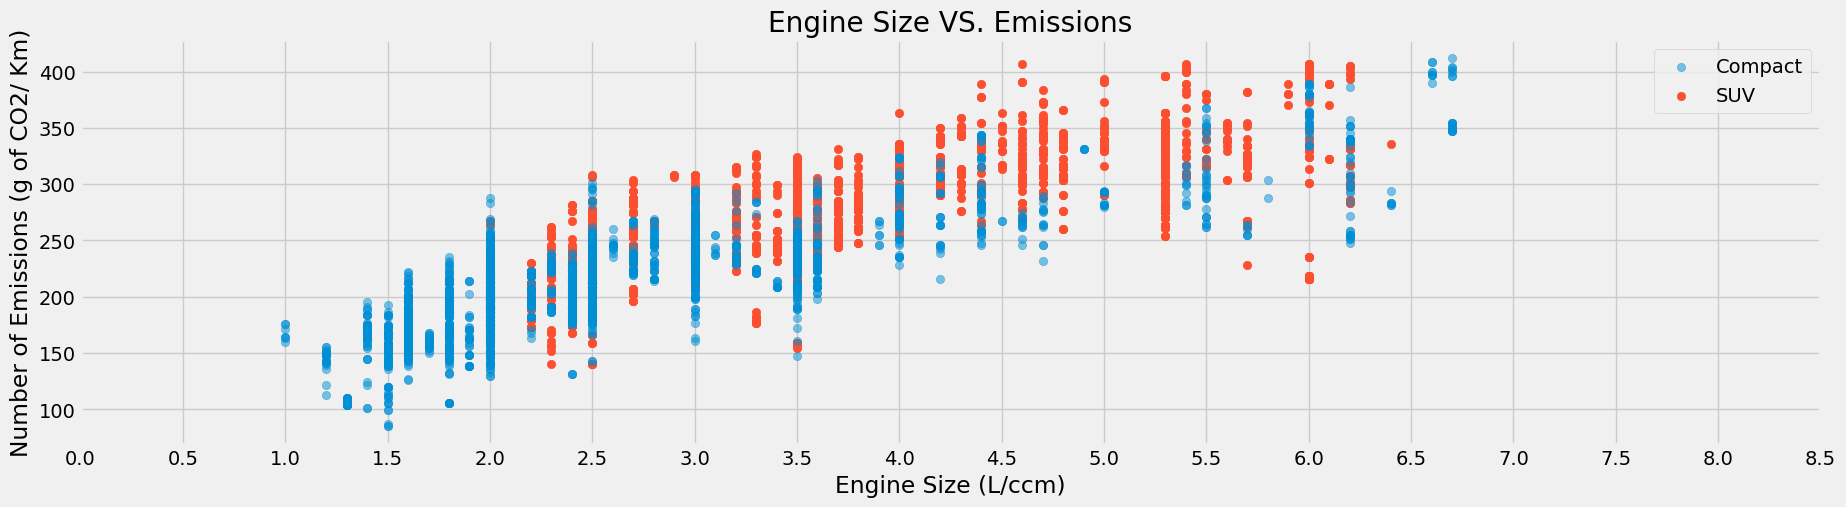

In [337]:
#This is the code for plotting engine size/emissions from our previous code

plt.figure(figsize= (20,5))
plt.scatter(scatter['eng_size'], scatter['emissions'],alpha = .5, zorder = 2)
plt.scatter(scattersuv['eng_size'], scattersuv['emissions'], zorder =1 )
plt.title("Engine Size VS. Emissions")
plt.xlabel('Engine Size (L/ccm)')
plt.ylabel('Number of Emissions (g of CO2/ Km)')
plt.legend(['Compact','SUV'])
plt.xticks(np.arange(0,9,.5));

From the visualization above demonstrated that yes, as engine size increases, so do the emissions from that vehicle. It also demonstrated on average the SUVs had larger engine sizes than the smaller compact cars. This graph helped us in understanding the reason behind why some vehicle classes have greater emissions than others. The engine size of the vehicle plays a key role in determining the emissions released, and the different vehicle classes can be grouped by their engine sizes often times. 

In [338]:
#correlation coefficient for engine size and the emissions 
corr_df = results.corr(numeric_only = True)
r = corr_df['eng_size']['emissions']
r

0.8212848807401029

Running our correlation coefficient confirmed this belief, as we saw there being a strong positive relationship between emissions and engine size at a coefficient rating of .8212

After seeing the results of the visulaization above about engine size versus emissions, we decided that it would be interesting to look at the efficiency of the different engines based off of their fuel consumption per kilometer. 

### Q4:  What's the average liters per 100 kilometers burnt highway driving for vehicles? And how do Compact cars compare?

We know wish to see what the average breakdown of these vehicles is with their L/100km driving on the highway. So far, compact cars have preformed the best for us, and so we wish to compare there numbers vs. the average as well to see if they are still preforming more effiecntly when driving on the highway, and by how much. 




In [339]:
#This code selects all infmoration for compact cars of all makes and models
sql_statement = """SELECT * 
                   FROM fuel_consumption
                   WHERE veh_class LIKE 'Compact' """

compact_avg = pd.read_sql_query(sql_statement, conn)
compact_avg

,year,make,model,veh_class,eng_size,cly,trans,fuel,fuel_cons,hwy_lkm,comb_lkm,comb_mpg,emissions
0,2000,acura,1.6el,compact,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,acura,1.6el,compact,1.6,4,M5,None,8.5,6.5,7.6,37,175
2,2000,audi,a4,compact,1.8,4,A5,Z,11.4,7.2,9.5,30,218
3,2000,audi,a4,compact,1.8,4,M5,Z,9.7,6.8,8.4,34,193
4,2000,audi,a4,compact,2.8,6,A5,Z,13.0,8.2,10.8,26,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,2022,volkswagen,jetta,compact,1.5,4,M6,X,8.0,5.5,6.9,41,161
3073,2022,volkswagen,jetta gli,compact,2.0,4,AM7,X,9.0,6.5,7.9,36,185
3074,2022,volkswagen,jetta gli,compact,2.0,4,M6,X,9.1,6.4,7.9,36,186
3075,2022,volvo,s60 b5,compact,2.0,4,AS8,Z,9.0,6.7,8.0,35,186


In [340]:
#This code gives us the statistics on compact cars in our dataset
stats_compact = compact_avg.describe()
stats_compact  

,year,eng_size,cly,fuel_cons,hwy_lkm,comb_lkm,comb_mpg,emissions
count,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000
mean,2010.833279,2.567988,5.010075,10.656809,7.362268,9.176146,32.303867,211.576211
std,6.118984,1.084103,1.639552,2.629594,1.442828,2.071471,7.369252,47.251648
min,2000.000000,1.000000,3.000000,3.500000,4.000000,3.700000,16.000000,85.000000
25%,2005.000000,2.000000,4.000000,8.900000,6.400000,7.800000,28.000000,180.000000
50%,2011.000000,2.200000,4.000000,10.400000,7.200000,9.000000,31.000000,207.000000
75%,2016.000000,3.000000,6.000000,12.000000,8.000000,10.200000,36.000000,235.000000
max,2022.000000,6.700000,12.000000,21.200000,13.800000,17.900000,76.000000,412.000000


In [341]:
#This code gives us the mean of highway liter per kilometer for compact cars
compact_avg_hwy_lkm = stats_compact["hwy_lkm"]["mean"]
compact_avg_hwy_lkm   

7.362268443288918

In [342]:
#This code finds that statistics for the fuel consumption data
stats = results.describe()
stats  

,year,eng_size,cly,fuel_cons,hwy_lkm,comb_lkm,comb_mpg,emissions
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [343]:
# This code gets the avergae highway liters per kilometer from the fuel data set 
avg_hwy_lkm = stats["hwy_lkm"]["mean"]
avg_hwy_lkm   

8.919125731512679

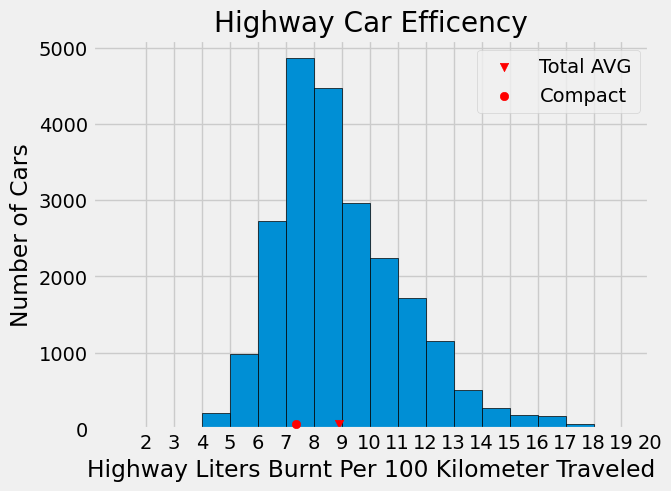

In [344]:
# This code plots the Highway Car distribution using a histogram and points the average 
#for the highway liters per kilometer in the fuel consumption dataset


plt.hist(results['hwy_lkm'], edgecolor = 'black', bins = np.arange(1,20, 1), zorder = 1)
plt.scatter(avg_hwy_lkm,60, color = 'red', marker="v", zorder=2)
plt.scatter(compact_avg_hwy_lkm,60, color = 'red', marker="o", zorder=3)
plt.xticks(np.arange(2,21, 1))
plt.xlabel('Highway Liters Burnt Per 100 Kilometer Traveled')
plt.ylabel('Number of Cars')
plt.title('Highway Car Efficency')
plt.legend(['Total AVG','Compact']);

From the visualization above, we see that these compact cars do infact require less liters of gas in order to travel the same distance as your average vehicle. We can also see the general shape of the graph is mostly pretty evenly distributed with just a slight positive tail for some very ineffienct vehicles on the high end. 

From here we really discovered what we felt was our last question we wished to ask. We had looked into many different factors to why a car may be more or less efficient. But a final note/trend that appeared to be forming yet not tested led us to our final question. 

### Q5:  How does curb weight compare to the emissions released from a vehicle?

Curb wieght is a messure of the overall weight of the vehicle with all of its accsorries attached and being fully fueled. We noticed that it seemed some of the smaller vehicle classes were always preforming better on emmisions. We also noted that smaller engine sizes resulted in better emmision prefomrances. Putting this together we were expecting that simply driving a smaller vehicle would mean that your emmisions would be lower overall. We wished to test this hypothisis with our final question. 

In [345]:
#Show the rows of the table.
sql_statement = """SELECT * 
                   FROM car_sales"""

sales_results = pd.read_sql_query(sql_statement, conn)
sales_results

,manufacturer,model,sales_in_thousands,year_resale_value,veh_type,price_in_thousands,eng_size,hpower,wbase,width,length,curb_weight,fuel_cap,fuel_effic,launch,power_perf_factor
0,acura,integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,acura,tl,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,acura,cl,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,acura,rl,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,audi,a4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,volvo,v40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,volvo,s70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,volvo,v70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,volvo,c70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [346]:
'''
CREATE TABLE "car_sales" (
  "id"	INTEGER
	"manufacturer"	TEXT,
	"model"	TEXT,
	"sales_in_thousands"	INTEGER,
	"year_resale_value"	INTEGER,
	"veh_type"	TEXT,
	"price_in_thousands"	INTEGER,
	"eng_size"	INTEGER,
	"hpower"	INTEGER,
	"wbase"	INTEGER,
	"width"	INTEGER,
	"length"	INTEGER,
	"curb_weight"	INTEGER,
	"fuel_cap"	INTEGER,
	"fuel_effic"	INTEGER,
  "launch"   TEXT, 
  "power_perf_factor"  INTEGER,
	PRIMARY KEY("id")
);
''';

In [347]:
#Using an except to find what car models are not on our fuel consumption list from the table car_sales
sql_statement = """
                SELECT manufacturer	, model 
                FROM car_sales
                
                EXCEPT
                
                SELECT make, model
                FROM fuel_consumption 
                """
join_results = pd.read_sql_query(sql_statement, conn)
join_results

,manufacturer,model
0,acura,cl
1,cadillac,escalade
2,chevrolet,lumina
3,chevrolet,prizm
4,chrysler,sebring conv.
5,dodge,durango
6,dodge,intrepid
7,dodge,neon
8,dodge,ram pickup
9,dodge,ram van


In [348]:
#Code for joing the tables car_sales and fuel_consumption on make/manufacturer and model
sql_statement = """
                SELECT *
                FROM fuel_consumption AS a
                        JOIN car_sales AS b
                        ON a.make = b.manufacturer and a.model = b.model 
                             
                
                """
join_results = pd.read_sql_query(sql_statement, conn)
join_results

,year,make,model,veh_class,eng_size,cly,trans,fuel,fuel_cons,hwy_lkm,...,eng_size,hpower,wbase,width,length,curb_weight,fuel_cap,fuel_effic,launch,power_perf_factor
0,2000,acura,integra,subcompact,1.8,4,A4,X,10.0,7.0,...,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,2000,acura,integra,subcompact,1.8,4,M5,X,9.3,6.8,...,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
2,2000,audi,a4,compact,1.8,4,A5,Z,11.4,7.2,...,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
3,2000,audi,a4,compact,1.8,4,M5,Z,9.7,6.8,...,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
4,2000,audi,a4,compact,2.8,6,A5,Z,13.0,8.2,...,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,2022,toyota,rav4,suv: small,2.5,4,AS8,X,8.8,6.8,...,2.0,127.0,94.9,66.7,163.8,2.668,15.3,27.0,5/6/2011,51.955109
2097,2022,toyota,sienna,minivan,2.5,4,AV,X,6.6,6.5,...,3.0,194.0,114.2,73.4,193.5,3.759,20.9,22.0,10/5/2012,78.027219
2098,2022,volkswagen,jetta,compact,1.5,4,AS8,X,7.7,5.7,...,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237
2099,2022,volkswagen,jetta,compact,1.5,4,M6,X,8.0,5.5,...,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237


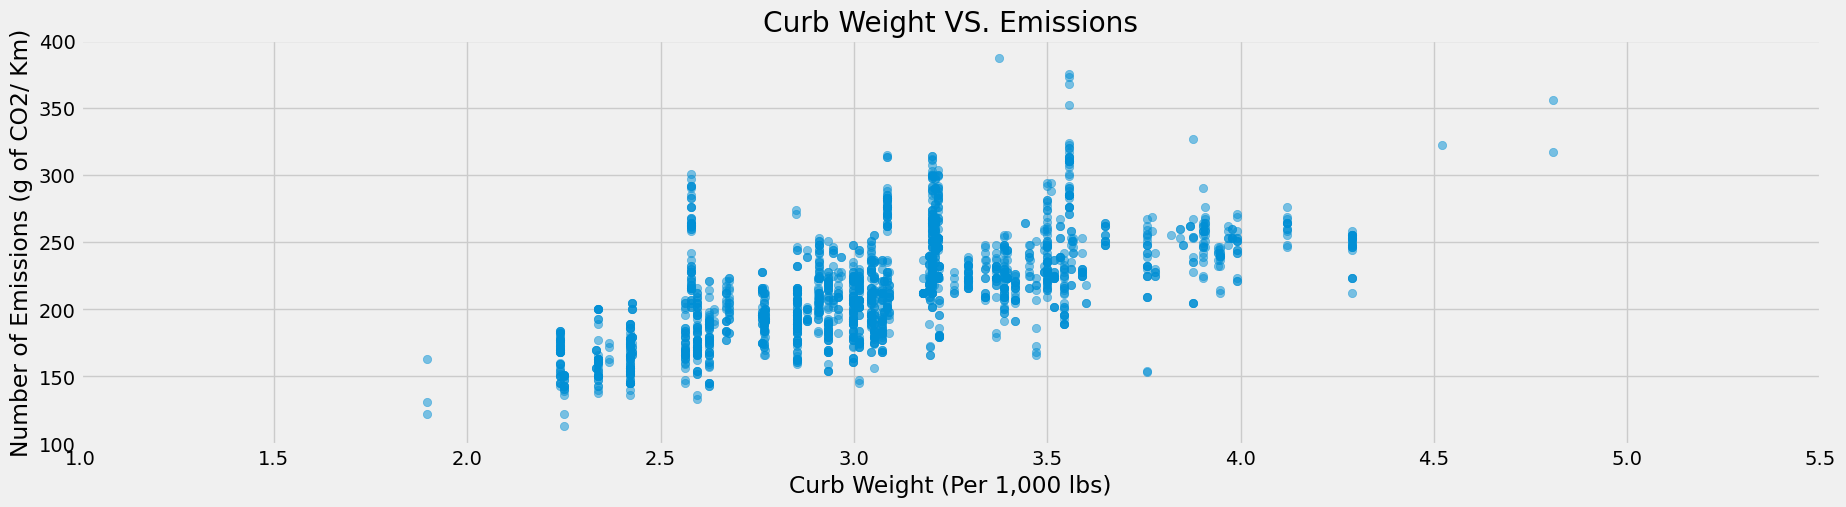

In [349]:
plt.figure(figsize= (20,5))
plt.scatter(join_results['curb_weight'], join_results['emissions'],alpha = .5)
plt.title("Curb Weight VS. Emissions")
plt.xlabel('Curb Weight (Per 1,000 lbs)')
plt.ylabel('Number of Emissions (g of CO2/ Km)')
plt.xticks(np.arange(1,6,.5));

In [350]:
#correlation coefficient for curb weight and emissions
corr_df = join_results.corr(numeric_only = True)
r = corr_df['curb_weight']['emissions']
r

0.6229957167361587

We found there to be correlation coefficient between curb weight and emmision levels of .6229. Meaning that there is a positive relationship like we had anticipated, but not to as strong of a degree as we were expecting. 

In [351]:
conn.close()

---

## Conclusion

After running all of our tests, we were able to come to some conclusions regarding what characteristics of a car most greatly correspond to higher overall emissions from that vehicle. We began our study by attempting to break down the vehicles by their vehicle class. We examined these groups against the overall fuel consumption. We were able to distinctly find that some car classes had greater fuel consumption levels than others. Larger vehicles such as SUVs and Trucks were clearly consuming more gas than smaller compact cars to travel the same distance. 
	From here wished to understand if the fuel type, had anything to do with the overall emissions released from a vehicle. We also tracked this data across time, but in the end, found very little correlation between fuel type and greater emissions, or that the overall trend for emissions was going down. 
	Since we now understood that the overall emissions released from a vehicle clearly had to deal more with the class of the car rather than the fuel source, we wanted to dive deeper into what caused these particular vehicle classes to consume more gas when driving. To figure this question out, we wished to see if the different classes could also be grouped by engine size, and whether engine size appeared to play a significant role within greater emissions or not. This is where we discovered there to be a strong positive relationship between the engine size of a vehicle and the vehicle having greater recorded emissions. We also saw that the compact cars with lesser overall emissions also had smaller engine sizes compared to the alternative SUV group. 
	From here we wished to compare these smaller compact cars and there more efficient liters burnt per kilometer traveled to the average. We wished to see the distribution over all vehicles and how they compared to what we had now determined to be the most efficient group in compact cars. The graph clearly demonstrated that the group was well bellow the average, but also did a strong job at visualizing the tail ends and how there were many outliers. 
	Our final questioned was then derived to determine whether these trends from different groupings could be attributed to the weight of the vehicle. We compared the curb weight of vehicles to their overall emission levels and found a positive correlation, but one that was less strong than the engine size vs. emissions. Due to this we were able to conclude that the engine size of the vehicle is a more important determining factor than the weight of the vehicle for determining its overall emissions. When choosing a vehicle that results in less emissions into the atmosphere, going with smaller classes, weights, and engine sizes are the best ways to reduce the level of CO2 admitted. 
